In [1]:
import librosa
import numpy as np
from scipy.spatial.distance import cdist
from IPython.display import Audio
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time


import random

import json

with open('../output.jsonl', 'r') as json_file:
    json_list = list(json_file)

events = []
for json_str in json_list:
    result = json.loads(json_str)
    events.append(result)

events[-1]

{'event_times': {'10.33.1.82': 1732471767.4038649,
  '10.33.1.105': 1732471764.087499,
  '10.33.1.149': 1732471764.1453},
 'coord_dict': {'10.33.1.105': [0, 0],
  '10.33.1.149': [1, 0],
  '10.33.1.82': [0.5, 0.866],
  'source': [196.03009867943254, 746963.0402582065]},
 'amplitude': 5.203858852386475}

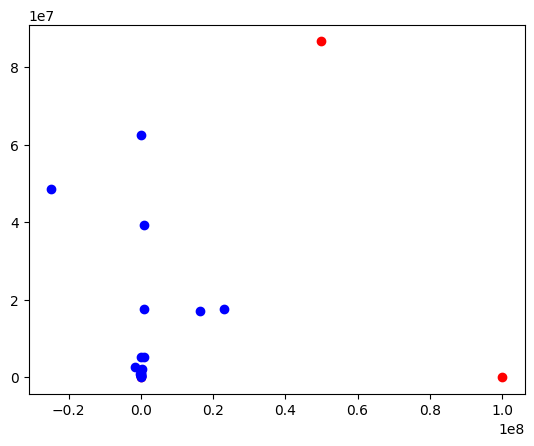

In [7]:
# Assuming `events` is defined and follows your format
scale = 100000000
fig, ax = plt.subplots()

for i, d in enumerate(events):
    x = [z[0] for z in d["coord_dict"].values()]
    y = [z[1] for z in d["coord_dict"].values()]
    
    x = [z[0] for z in d["coord_dict"].values()]
    y = [z[1] for z in d["coord_dict"].values()]
    if i==0:
        ax.scatter(np.array(x[:3])*scale,np.array(y[:3])*scale,c='red')
    ax.scatter(x[-1:],y[-1:],c='blue')
    
    # Display the figure and clear the output
    display(fig)
    clear_output(wait=True)
    time.sleep(0.5)
    # break

# Final plot display to retain the last state
# display(fig)

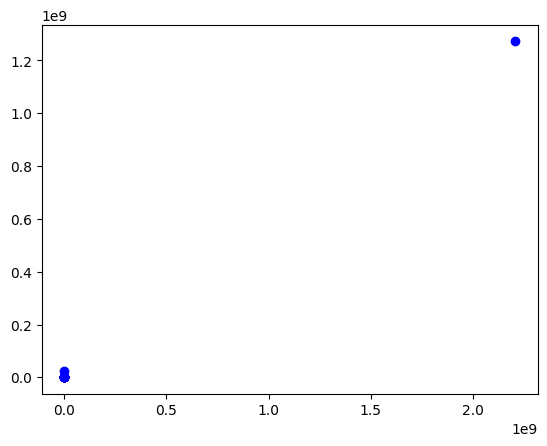

In [ ]:
import time
import json
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output, display

def follow(file):
    file.seek(0, 2)  # Move to the end of the file
    while True:
        line = file.readline()
        if not line:
            time.sleep(0.1)  # Briefly wait for new data
            continue
        yield line

# Open the file
with open('../output.jsonl', 'r') as f:
    scale = 10000
    fig, ax = plt.subplots()
    first_iteration = True
    for line in follow(f):
        result = json.loads(line)
        x = [z[0] for z in result["coord_dict"].values()]
        y = [z[1] for z in result["coord_dict"].values()]
        if first_iteration:
            ax.scatter(np.array(x[:3])*scale, np.array(y[:3])*scale, c='red')
            first_iteration = False
        ax.scatter(x[-1:], y[-1:], c='blue')
        # Display the figure and clear the output
        display(fig)
        clear_output(wait=True)
        time.sleep(0.5)


KeyboardInterrupt: 

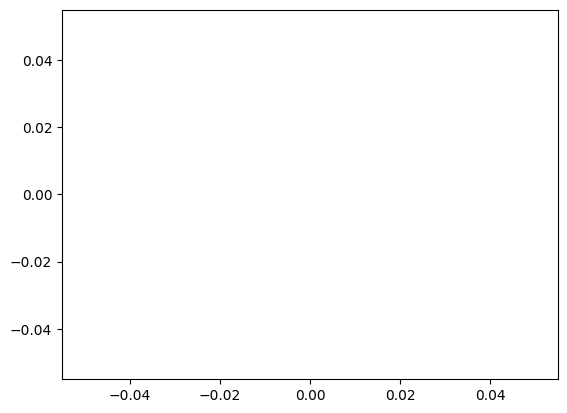